<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
average_weight = [33,34,35,36,32,28,29,30,31,37,36,35,33,34,31,40,24]

In [0]:
from scipy import stats

In [0]:
stats.ttest_1samp(average_weight,35) #one sample t test

Ttest_1sampResult(statistic=-2.354253623010381, pvalue=0.03166804359862131)

In [0]:
average_weight1 = [29,31,28,33,31,34,32,20,32,28,27,26,30,31,34,30]

In [0]:
stats.ttest_ind(average_weight,average_weight1)

Ttest_indResult(statistic=2.404544177024533, pvalue=0.022355127034138323)

In [0]:
before_metaphor = [68,45,46,34,23,67,80,120,34,54,68]
after_metaphor = [28,25,26,24,13,37,30,30,54,34,38]

In [0]:
stats.ttest_rel(before_metaphor,after_metaphor)

Ttest_relResult(statistic=3.2771720738937873, pvalue=0.00832867082029929)

In [0]:
!pip install researchpy

In [0]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import researchpy as rc
import warnings
from scipy import  stats
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls -alrt '/content/drive/My Drive/Colab Notebooks/Dataset/'

total 69711
-rw------- 1 root root   403157 Apr 14 19:01 hmeq.csv
-r-------- 1 root root 66076595 Apr 21 15:06 dress_dataset.rar
drwx------ 2 root root     4096 Apr 21 19:01 frames
-rw------- 1 root root     3452 Apr 22 17:09 loan_analysis_summary.csv
-rw------- 1 root root  2646460 Apr 23 00:16 flights.RDS
-rw------- 1 root root  1600317 Apr 23 00:34 flights.rda
-rw------- 1 root root   648353 Apr 25 03:03 bike_sharing.csv


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/bike_sharing.csv')

In [0]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [0]:
df.shape


(10886, 12)

In [0]:
df.info

<bound method DataFrame.info of                   datetime  season  holiday  ...  casual  registered  count
0      2011-01-01 00:00:00       1        0  ...       3          13     16
1      2011-01-01 01:00:00       1        0  ...       8          32     40
2      2011-01-01 02:00:00       1        0  ...       5          27     32
3      2011-01-01 03:00:00       1        0  ...       3          10     13
4      2011-01-01 04:00:00       1        0  ...       0           1      1
...                    ...     ...      ...  ...     ...         ...    ...
10881  2012-12-19 19:00:00       4        0  ...       7         329    336
10882  2012-12-19 20:00:00       4        0  ...      10         231    241
10883  2012-12-19 21:00:00       4        0  ...       4         164    168
10884  2012-12-19 22:00:00       4        0  ...      12         117    129
10885  2012-12-19 23:00:00       4        0  ...       4          84     88

[10886 rows x 12 columns]>

In [0]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [0]:
df['atemp'].corr(df['temp'])

0.9849481104817068

In [0]:
df[['atemp','temp']].corr()

,atemp,temp
atemp,1.000000,0.984948
temp,0.984948,1.000000


In [0]:
df.drop(['datetime','atemp'],axis=1,inplace=True)

In [0]:
df.apply(lambda x :x.nunique())

season          4
holiday         2
workingday      2
weather         4
temp           49
humidity       89
windspeed      28
casual        309
registered    731
count         822
dtype: int64

In [0]:
num_scaled = scale (df[['temp','humidity','windspeed','casual','registered']],copy=False)

In [0]:
num_scaled

array([[-1.33366069,  0.99321305, -1.56775367, -0.66099193, -0.94385353],
       [-1.43890721,  0.94124921, -1.56775367, -0.56090822, -0.81805246],
       [-1.43890721,  0.94124921, -1.56775367, -0.62095844, -0.851158  ],
       ...,
       [-0.80742813, -0.04606385,  0.26970368, -0.64097518,  0.05593396],
       [-0.80742813, -0.04606385, -0.83244247, -0.48084125, -0.25525818],
       [-0.91267464,  0.21375537, -0.46560752, -0.64097518, -0.47375478]])

In [0]:
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [0]:
sample_01 = df[df['workingday'] == 1]
sample_02 = df[df['workingday'] == 0]

In [0]:
print(sample_01.shape,sample_02.shape)

(7412, 10) (3474, 10)


In [0]:
sample_01 = sample_01.sample(3474)
print(sample_01.shape,sample_02.shape)

(3474, 10) (3474, 10)


In [0]:
alpha = 0.05
Stats,Pvalue = stats.levene(sample_01['count'],sample_01['count'])
print(f' Test statistics : {Stats} \n Alpha : {alpha} \n P-value : {Pvalue}')
if Pvalue > alpha:
  print(' Variances are same accept null hypothesis ')
else:
  print(' Variances are not same reject not null hypothesis ')

 Test statistics : 0.0 
 Alpha : 0.05 
 P-value : 1.0
 Variances are same accept null hypothesis 


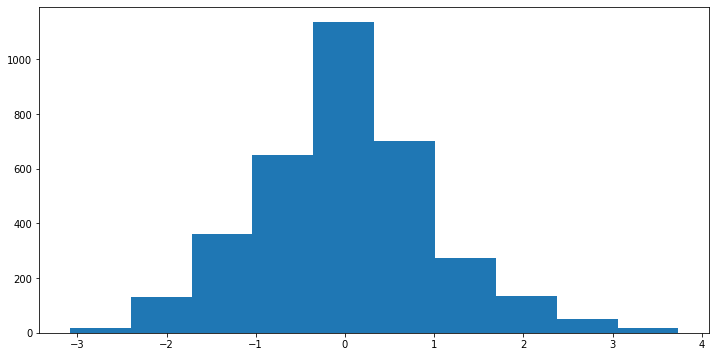

In [0]:
diff = scale((np.array(sample_01['count']) - np.array(sample_02['count'])))
plt.figure(figsize=(12,6))
plt.hist(diff)
plt.show()

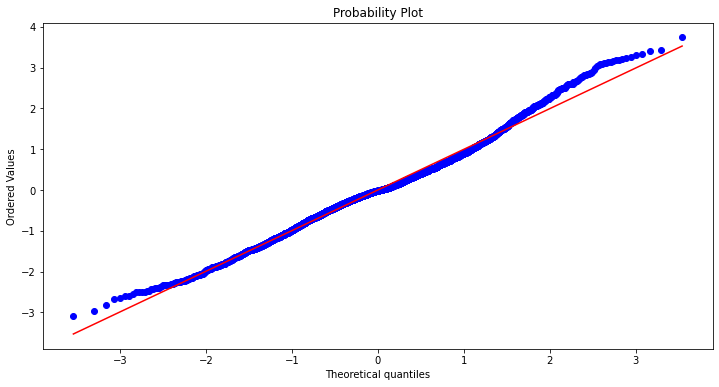

In [0]:
plt.figure(figsize=(12,6))
stats.probplot(diff,plot=plt,dist='norm')
plt.show()

In [0]:
alpha = 0.05
statistic,p_value = stats.shapiro(diff)
if p_value > alpha:
  print(f'Accept Null Hypothesis p-value : {p_value}')
else:
  print(f'Reject Null Hypothesis p-value : {p_value}')

Reject Null Hypothesis p-value : 3.7587883245379997e-14


In [0]:
alpha = 0.05
statistic , p_value = stats.ttest_ind(sample_01['count'],sample_02['count'])
if p_value > alpha:
  print(f'Fail to reject Null Hypothesis p-value is {p_value}')
else:
  print('Reject Null Hypothesis')

Fail to reject Null Hypothesis p-value is 0.4885503829750929


In [0]:
population_mean = 100
population_std = 15
n_sample = 30

In [0]:
avg_class= np.vectorize(int)(np.random.normal(loc=population_mean,scale=population_std,size=n_sample))

In [0]:
print("A typical class I.Q.:",avg_class)

A typical class I.Q.: [ 80 129 112  97  89  93  91 109  91  95  97  85  98  93 108 107 109 116
  73  77 105 118 100 102  76  87  85 106 107 105]


In [0]:
given_class = np.vectorize(int)(np.random.normal(loc=112.5,scale=population_std,size=n_sample))


In [0]:
print("A typical class I.Q.:",given_class)

A typical class I.Q.: [163 118 117 131 119  91  94 116  98 100 123  85 111 110 109 113  91 115
 118  96 106 110 111 110 113  93 116 114 115 101]


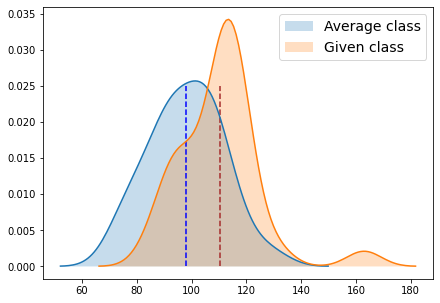

In [0]:
plt.figure(figsize=(7,5))
sns.kdeplot(avg_class,shade=True)
sns.kdeplot(given_class,shade=True)
plt.legend(['Average class','Given class'],fontsize=14)
plt.vlines(x=avg_class.mean(),ymin=0,ymax=0.025,color='blue',linestyle='--')
plt.vlines(x=given_class.mean(),ymin=0,ymax=0.025,color='brown',linestyle='--')
plt.show()

In [0]:
std_err= population_std/np.sqrt(n_sample)

In [0]:
z_stat=(given_class.mean()-population_mean)/std_err

In [0]:
print("Standard error of the mean:",std_err)
print("Z-statistic:",z_stat)

Standard error of the mean: 2.7386127875258306
Z-statistic: 3.7366850034241335


In [0]:
import scipy.stats as st
alpha=0.05
rejection_threshold=st.norm.ppf(1-alpha)

In [0]:
if z_stat>rejection_threshold:
  print("We reject the NULL hypothesis. The class I.Q. is indeed above average")
else:
  print("We cannot reject the NULL hypothesis that class average is same as population average.")

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [0]:
def hypothesis_testing(n_sample=30,population_mean=100,population_std=15,alpha=0.05):
  given_class=np.vectorize(int)(np.random.normal(loc=112.5,scale=population_std,size=n_sample))
  std_err= population_std/np.sqrt(n_sample)
  z_stat=(given_class.mean()-population_mean)/std_err

  alpha=0.05
  rejection_threshold=st.norm.ppf(1-alpha)
  if z_stat>rejection_threshold:
    print("We reject the NULL hypothesis. The class I.Q. is indeed above average")
  else:
    print("We cannot reject the NULL hypothesis that class average is same as population average.")


In [0]:
hypothesis_testing()

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [0]:
hypothesis_testing(population_mean=107)

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [0]:
hypothesis_testing(population_std=10)

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [0]:
hypothesis_testing(population_std=40)

We cannot reject the NULL hypothesis that class average is same as population average.


In [0]:
hypothesis_testing(n_sample=4)

We cannot reject the NULL hypothesis that class average is same as population average.


In [0]:
hypothesis_testing(n_sample=100)

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [0]:
hypothesis_testing(alpha=0.01)

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [0]:
def independent_ttest(data1, data2, alpha=0.05):
  """
  Student's t-test for independent groups
  Argument:
    data1: First group data in numpy array format
    data2: Second group two data in numpy array format
    alpha: Significance level
  Returns:
    t_stat: Computed t-statistic
    df: Degrees of freedom
    cv: Critical value
  p: p-value (of NULL hypothesis)
  """
  import scipy.stats as st
  # calculate means
  mean1, mean2 = np.mean(data1), np.mean(data2)
  # calculate standard errors
  se1, se2 = st.sem(data1), st.sem(data2)
  # standard error on the difference between the samples
  sed = np.sqrt(se1**2.0 + se2**2.0)
  # calculate the t statistic
  t_stat = (mean1 - mean2) / sed
  # degrees of freedom
  df = len(data1) + len(data2) - 2
  # calculate the critical value
  cv = st.t.ppf(1.0 - alpha, df)
  # calculate the p-value
  p = (1.0 - st.t.cdf(abs(t_stat), df)) * 2.0
  # return everything
  return t_stat, df, cv, p

In [0]:
n_sample=20

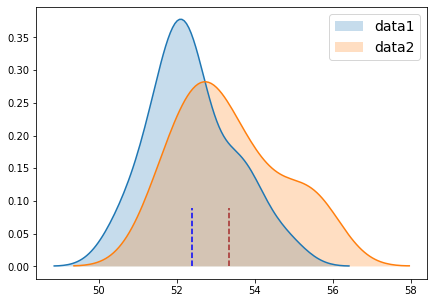

In [0]:
data1 = 5 * np.random.rand(n_sample) + 50
data2 = 5 * np.random.rand(n_sample) + 51

plt.figure(figsize=(7,5))
sns.kdeplot(data1,shade=True)
sns.kdeplot(data2,shade=True)
plt.legend(['data1','data2'],fontsize=14)
plt.vlines(x=data1.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--')
plt.vlines(x=data2.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--')
plt.show()

In [0]:
alpha=0.05
t_stat,df,cv,p= independent_ttest(data1, data2,alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
print()


# interpret via critical value
if abs(t_stat) <= cv:
  print('Fail to reject null hypothesis that the means are equal.')
else:
  print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
  print('Fail to reject null hypothesis that the means are equal.')
else:
  print('Reject the null hypothesis that the means are equal.')

t=-2.513, df=38, cv=1.686, p=0.016

Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [0]:
n_sample=200

In [0]:
data1 = 5 * np.random.randn(n_sample) +50
data2= 5 * np.random.randn(n_sample) + 51
plt.figure(figsize=(7,5)
)
sns.kdeplot(data1,shade=True)
sns.kdeplot(data2,shade=True)
plt.legend(['data1','data2'],fontsize=14)
plt.vlines(x=data1.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--')
plt.vlines(x=data2.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--')
plt.show()

In [0]:
alpha=0.05
t_stat,df,cv,p= independent_ttest(data1,data2,alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
print()
# interpret via critical value
if abs(t_stat) <= cv:
  print('Fail to reject null hypothesis that the means are equal.')
else:
  print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
  print('Fail to reject null hypothesis that the means are equal.')
else:
  print('Reject the null hypothesis that the means are equal.')

t=-1.721, df=398, cv=1.649, p=0.086

Reject the null hypothesis that the means are equal.
Fail to reject null hypothesis that the means are equal.


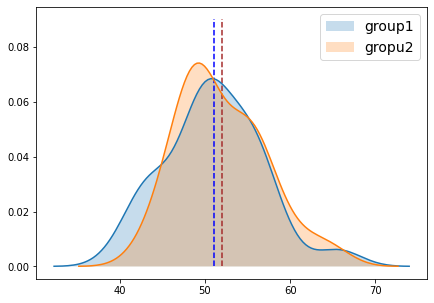

In [0]:
n_sample=50
group1 = 5 * np.random.randn(n_sample) + 50
group2 = 5 * np.random.randn(n_sample) + 52
plt.figure(figsize=(7,5)
)
sns.kdeplot(group1,shade=True)
sns.kdeplot(group2,shade=True)
plt.legend(['group1','gropu2'],fontsize=14)
plt.vlines(x=group1.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--')
plt.vlines(x=group2.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--')
plt.show()

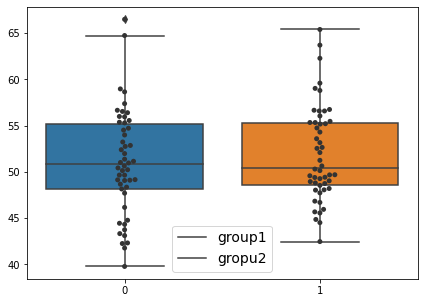

In [0]:
plt.figure(figsize=(7,5))
sns.boxplot(data=[group1,group2])
sns.swarmplot(data=[group1,group2],color='.2')
plt.legend(['group1','gropu2'],fontsize=14)
plt.show()

In [0]:
f,p = st.f_oneway(group1,group2)
print("The F-statistic obtained running ANOVA on the data groups:",f)
print("The p-value of the ANOVA test:",p)
if p>0.05:
  print("\nANOVA fails to reject the hypothesis of equal mean")
else:
  print("\nWe reject the hypothesis of equal mean as per ANOVA test result")

The F-statistic obtained running ANOVA on the data groups: 0.7886982127919728
The p-value of the ANOVA test: 0.37666857331262427

ANOVA fails to reject the hypothesis of equal mean


In [0]:
def multi_anova(groups,alpha=0.05):
  """
  Two-way ANOVA between multiple groups
  groups: A dictionary object of trial groups
  """
  from itertools import combinations
  list_anova = list(combinations(list(groups.keys()),2))
  for comb in list_anova:
    _,p=st.f_oneway(groups[comb[0]],groups[comb[1]])
    if p>0.05:
      print("\nANOVA fails to reject the hypothesis of equal mean for {} and {}".format(comb[0],comb[1]))                                                                                               
    else:
      print("\nWe reject the hypothesis of equal mean for {} and {} as per ANOVA test result".format(comb[0],comb[1]))

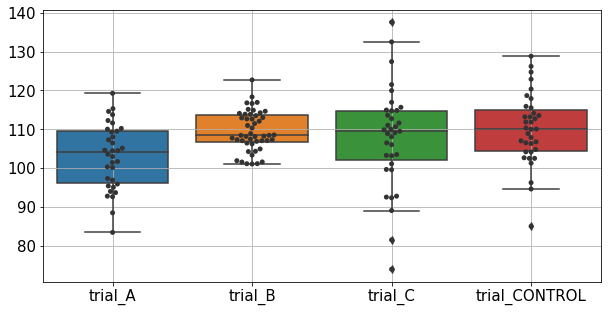

In [0]:
trial_A= 9*np.random.randn(34)+102
trial_B= 6*np.random.randn(48)+109
trial_C= 12 * np.random.randn(35)+110
trial_CONTROL= 10*np.random.randn(35)+110
plt.figure(figsize=(10,5))
ax=sns.boxplot(data=[trial_A,trial_B,trial_C,trial_CONTROL])
ax=sns.swarmplot(data=[trial_A,trial_B,trial_C,trial_CONTROL],color='.2')
ax.set_xticklabels(['trial_A','trial_B','trial_C','trial_CONTROL'],fontsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

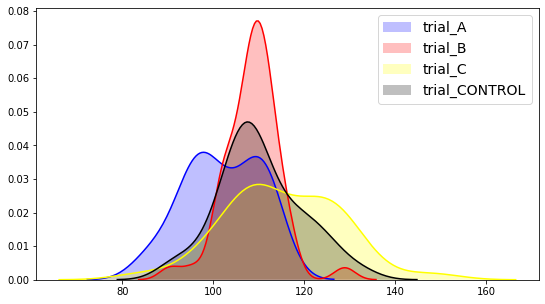

In [142]:
plt.figure(figsize=(9,5))
sns.kdeplot(trial_A,shade=True,color='Blue')
sns.kdeplot(trial_B,shade=True,color='red')
sns.kdeplot(trial_C,shade=True,color='yellow')
sns.kdeplot(trial_CONTROL,shade=True,color='black')
plt.legend(['trial_A','trial_B','trial_C','trial_CONTROL'],fontsize=14)
plt.show()

In [0]:
groups = {'trial_A':trial_A,'trial_B':trial_B,'trial_C':trial_C,'trial_CONTROL':trial_CONTROL}

In [144]:
multi_anova(groups)


We reject the hypothesis of equal mean for trial_A and trial_B as per ANOVA test result

We reject the hypothesis of equal mean for trial_A and trial_C as per ANOVA test result

We reject the hypothesis of equal mean for trial_A and trial_CONTROL as per ANOVA test result

We reject the hypothesis of equal mean for trial_B and trial_C as per ANOVA test result

ANOVA fails to reject the hypothesis of equal mean for trial_B and trial_CONTROL

ANOVA fails to reject the hypothesis of equal mean for trial_C and trial_CONTROL


In [145]:
import pandas as pd

A = [12.6, 12, 11.8, 11.9, 13, 12.5, 14]
B = [10, 10.2, 10, 12, 14, 13]
C = [10.1, 13, 13.4, 12.9, 8.9, 10.7, 13.6, 12]

all_scores = A + B + C
company_names = (['A'] * len(A)) + (['B'] * len(B)) + (['C'] * len(C))

data = pd.DataFrame({'company': company_names, 'score': all_scores})
data.head(20)

,company,score
0,A,12.6
1,A,12.0
2,A,11.8
3,A,11.9
4,A,13.0
5,A,12.5
6,A,14.0
7,B,10.0
8,B,10.2
9,B,10.0


In [146]:
data.groupby('company').mean()

,score
company,
A,12.542857
B,11.533333
C,11.825000


In [147]:
data.head(1)

,company,score
0,A,12.6


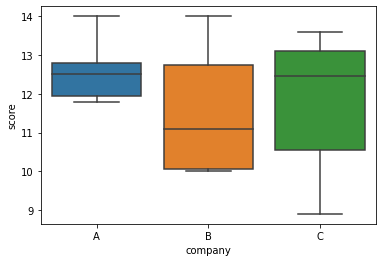

In [148]:
import seaborn as sns
sns.boxplot(x=data["company"],y=data["score"])

In [149]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('score ~ company',data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df     sum_sq   mean_sq         F    PR(>F)
company    2.0   3.606905  1.803452  0.821297  0.455683
Residual  18.0  39.525476  2.195860       NaN       NaN


In [150]:
overall_mean= data['score'].mean()
overall_mean

11.980952380952381

In [151]:
data['overall_mean']=overall_mean
ss_total = sum((data['score']- data['overall_mean'])**2)
ss_total

43.132380952380956

In [152]:
group_means = data.groupby('company').mean()
group_means = group_means.rename(columns = {'score': 'group_mean'})
group_means

,group_mean,overall_mean
company,,
A,12.542857,11.980952
B,11.533333,11.980952
C,11.825000,11.980952


In [153]:
data = data.merge(group_means, left_on = 'company', right_index = True)
ss_residual = sum((data['score'] - data['group_mean'])**2)
ss_residual

39.52547619047619

In [154]:
data

,company,score,overall_mean_x,group_mean,overall_mean_y
0,A,12.6,11.980952,12.542857,11.980952
1,A,12.0,11.980952,12.542857,11.980952
2,A,11.8,11.980952,12.542857,11.980952
3,A,11.9,11.980952,12.542857,11.980952
4,A,13.0,11.980952,12.542857,11.980952
5,A,12.5,11.980952,12.542857,11.980952
6,A,14.0,11.980952,12.542857,11.980952
7,B,10.0,11.980952,11.533333,11.980952
8,B,10.2,11.980952,11.533333,11.980952
9,B,10.0,11.980952,11.533333,11.980952


In [155]:
ss_explained = sum((data['overall_mean_x'] - data['group_mean'])**2)
ss_explained

3.6069047619047776

In [156]:
n_groups = len(set(data['company']))
n_obs = data.shape[0]
df_residual = n_obs - n_groups
ms_residual = ss_residual / df_residual
ms_residual

2.1958597883597886

In [157]:
df_explained = n_groups - 1
ms_explained = ss_explained / df_explained
ms_explained

1.8034523809523888

In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import warnings
from scipy import stats
%matplotlib inline

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/bike_sharing.csv')

In [0]:
df.drop(['datetime','atemp'],axis = 1,inplace=True)

In [161]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [0]:
df.drop(df[df['weather']==4].index,axis=0,inplace=True) #remove the records where weather == 4

In [163]:
df.groupby('weather')['count'].describe() #groupby weather situation and check the description

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


In [166]:
alpha = 0.05
Stats,p_value = stats.f_oneway(df['count'][df['weather']==1],df['count'][df['weather']==2],df['count'][df['weather']==3])
if p_value > alpha :
  print(f' Failed to reject null hypothesis \n Weather situation have no impact on bike rentals \n p-value : {p_value}')
else:
  print(f' Reject null hypothesis \n Weather situation has impact on bike rentals \n p-value : {p_value}')

 Reject null hypothesis 
 Weather situation has impact on bike rentals 
 p-value : 4.976448509904196e-43


In [167]:
from statsmodels.stats.multicomp import MultiComparison
mul_comp = MultiComparison(df['count'],df['weather'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2 -26.2813 0.001  -35.6159 -16.9466   True
     1      3 -86.3905 0.001 -101.5842 -71.1968   True
     2      3 -60.1092 0.001   -76.502 -43.7164   True
------------------------------------------------------


In [168]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


In [169]:
df.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [181]:
model = ols('count ~ C(weather) * C(season)',df).fit() #fit the regression model
!model = ols(,df).fit() #fit the regression model
print(model.summary()) #print summary

PatsyError: ignored

In [175]:
sm.stats.anova_lm(model) ##perform two way anova

NameError: ignored

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
df_raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/QoSvsQoESyn.csv')

In [183]:
copy_df=df_raw.copy(deep=True)
Copy_df = pd.DataFrame(df_raw, columns=['cellAccessibilityRankDesc'])
Copy_df.head()

,cellAccessibilityRankDesc
0,ACCEPTABLE
1,ACCEPTABLE
2,ACCEPTABLE
3,ACCEPTABLE
4,ACCEPTABLE


In [184]:
copy_df.head()

,cellAccessibilityRankDesc,crmInboundInteractionCount
0,ACCEPTABLE,1
1,ACCEPTABLE,1
2,ACCEPTABLE,1
3,ACCEPTABLE,1
4,ACCEPTABLE,1


In [185]:
copy_df.shape

(3047, 2)

In [186]:
copy_df.isnull().sum()

cellAccessibilityRankDesc     0
crmInboundInteractionCount    0
dtype: int64

In [187]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   cellAccessibilityRankDesc   3047 non-null   object
 1   crmInboundInteractionCount  3047 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.7+ KB


In [188]:
copy_df.describe()

,crmInboundInteractionCount
count,3047.000000
mean,0.985560
std,0.780879
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [189]:
copy_df['cellAccessibilityRankDesc'].value_counts()

GOOD          1199
ACCEPTABLE     983
EXCELLENT      865
Name: cellAccessibilityRankDesc, dtype: int64

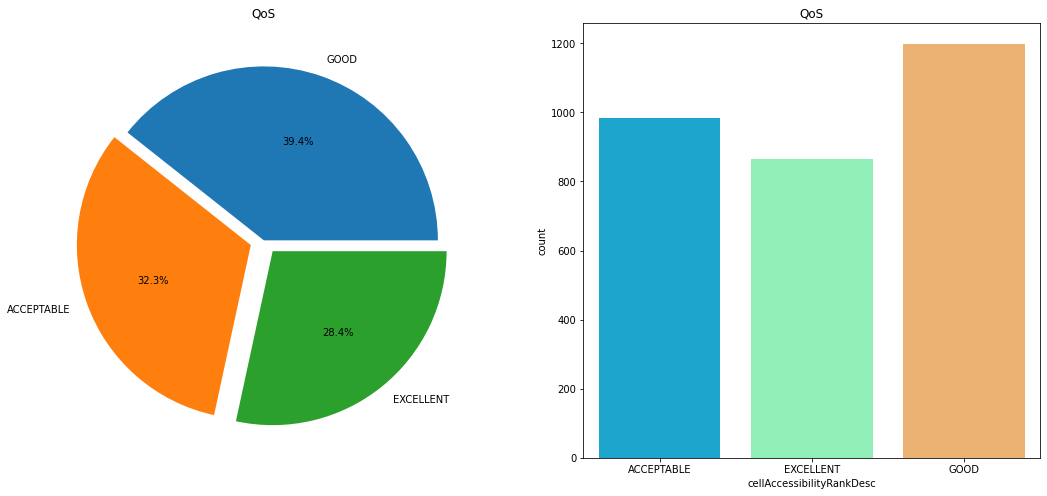

In [191]:
f,ax=plt.subplots(1,2,figsize=(18,8))
copy_df['cellAccessibilityRankDesc'].value_counts().plot.pie(explode=[0,0.08,0.08],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('QoS')
ax[0].set_ylabel('')
sns.countplot('cellAccessibilityRankDesc',data=copy_df,ax=ax[1], palette='rainbow')
ax[1].set_title('QoS')
plt.show()

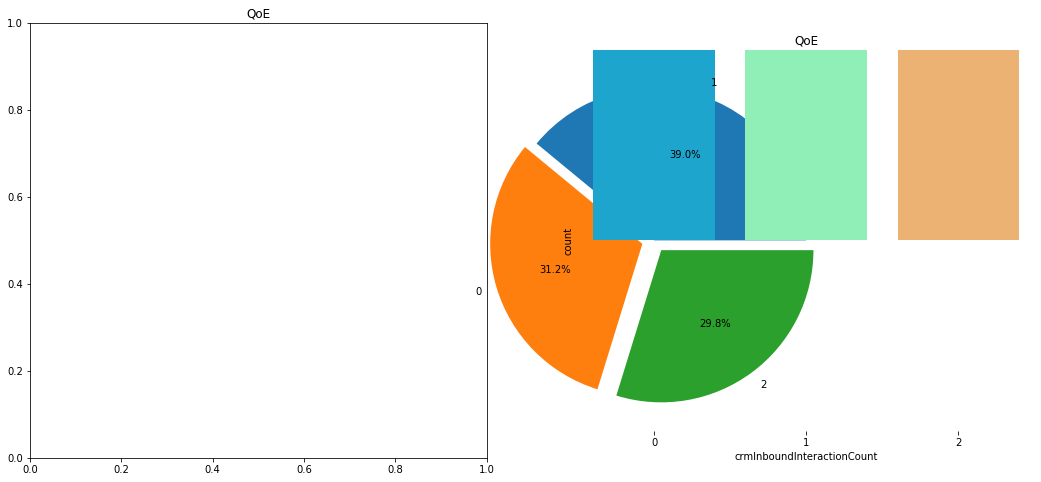

In [193]:
f,ax=plt.subplots(1,2,figsize=(18,8))
copy_df['crmInboundInteractionCount'].value_counts().plot.pie(explode=[0,0.08,0.08],autopct='%1.1f%%',ax=ax[1])
ax[0].set_title('QoE')
ax[0].set_ylabel('')
sns.countplot('crmInboundInteractionCount',data=copy_df,ax=ax[1], palette='rainbow')
ax[1].set_title('QoE')
plt.show()

In [194]:
copy_df.groupby('cellAccessibilityRankDesc')['crmInboundInteractionCount'].unique()

cellAccessibilityRankDesc
ACCEPTABLE    [1, 2, 0]
EXCELLENT     [0, 1, 2]
GOOD          [2, 1, 0]
Name: crmInboundInteractionCount, dtype: object

In [195]:
copy_df.groupby(['cellAccessibilityRankDesc', 'crmInboundInteractionCount']).size()

cellAccessibilityRankDesc  crmInboundInteractionCount
ACCEPTABLE                 0                              55
                           1                             884
                           2                              44
EXCELLENT                  0                             767
                           1                              33
                           2                              65
GOOD                       0                             129
                           1                             272
                           2                             798
dtype: int64

In [198]:
pd.crosstab(copy_df['cellAccessibilityRankDesc'],df_raw['crmInboundInteractionCount'],margins=True)

crmInboundInteractionCount,0,1,2,All
cellAccessibilityRankDesc,,,,
ACCEPTABLE,55,884,44,983
EXCELLENT,767,33,65,865
GOOD,129,272,798,1199
All,951,1189,907,3047


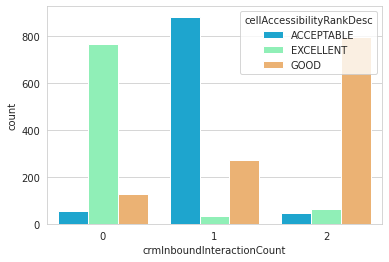

In [200]:
sns.set_style('whitegrid')
sns.countplot(x='crmInboundInteractionCount', hue='cellAccessibilityRankDesc', data=copy_df, palette='rainbow')

In [201]:
copy_df[['cellAccessibilityRankDesc', 'crmInboundInteractionCount']].groupby(['cellAccessibilityRankDesc'])

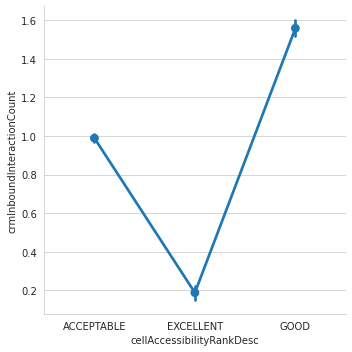

In [202]:
sns.factorplot('cellAccessibilityRankDesc','crmInboundInteractionCount',data=copy_df)
plt.show()

In [0]:
copy_df=pd.get_dummies(df_raw,drop_first=True)


In [204]:
copy_df

,crmInboundInteractionCount,cellAccessibilityRankDesc_EXCELLENT,cellAccessibilityRankDesc_GOOD
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
3042,0,0,1
3043,0,0,1
3044,0,0,1
3045,0,0,1


In [205]:
copy_df1=df_raw.copy(deep=True)
Copy_df1 = pd.DataFrame(df_raw, columns=['cellAccessibilityRankDesc'])
Copy_df1.head()

,cellAccessibilityRankDesc
0,ACCEPTABLE
1,ACCEPTABLE
2,ACCEPTABLE
3,ACCEPTABLE
4,ACCEPTABLE


In [0]:
dum_df = pd.get_dummies(Copy_df, columns=["cellAccessibilityRankDesc"] )

In [207]:
dum_df

,cellAccessibilityRankDesc_ACCEPTABLE,cellAccessibilityRankDesc_EXCELLENT,cellAccessibilityRankDesc_GOOD
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
3042,0,0,1
3043,0,0,1
3044,0,0,1
3045,0,0,1


In [208]:
copy_df1.drop('cellAccessibilityRankDesc',axis=1,inplace=True)
copy_df1.head()

,crmInboundInteractionCount
0,1
1,1
2,1
3,1
4,1


In [209]:
new_data=dum_df.join(df_raw)
new_data.head()

,cellAccessibilityRankDesc_ACCEPTABLE,cellAccessibilityRankDesc_EXCELLENT,cellAccessibilityRankDesc_GOOD,cellAccessibilityRankDesc,crmInboundInteractionCount
0,1,0,0,ACCEPTABLE,1
1,1,0,0,ACCEPTABLE,1
2,1,0,0,ACCEPTABLE,1
3,1,0,0,ACCEPTABLE,1
4,1,0,0,ACCEPTABLE,1


In [210]:
df_raw.head()

,cellAccessibilityRankDesc,crmInboundInteractionCount
0,ACCEPTABLE,1
1,ACCEPTABLE,1
2,ACCEPTABLE,1
3,ACCEPTABLE,1
4,ACCEPTABLE,1


In [0]:
rank_desk=pd.crosstab(index=df_raw['cellAccessibilityRankDesc'],columns=df_raw['crmInboundInteractionCount'])

In [213]:
rank_desk

crmInboundInteractionCount,0,1,2
cellAccessibilityRankDesc,,,
ACCEPTABLE,55,884,44
EXCELLENT,767,33,65
GOOD,129,272,798


In [214]:
rank_desk.iloc[0].values #we can observe the particular value at every index

array([ 55, 884,  44])

In [0]:
from scipy import stats #import stats package
(chi2, p, dof,_) = stats.chi2_contingency([rank_desk.iloc[0].values,rank_desk.iloc[1].values,rank_desk.iloc[2].values])

In [219]:
print ("chi2 : " ,chi2)
print ("p-value : " ,p)
print ("Degree of Freedom : " ,dof)

chi2 :  3192.2255875828437
p-value :  0.0
Degree of Freedom :  4


In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/zomato.csv')

In [235]:
print("Percentage null or na values in df")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)
data.info() #checking different type of dat

Percentage null or na values in df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [0]:
data=data.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and sa

In [238]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [0]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [240]:
#Remove the NaN values from the dataset
data.isnull().sum()
data.dropna(how='any',inplace=True)
data.info() #.info() function is used t

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [241]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [242]:
data= data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
'listed_in(city)':'city'})
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [243]:
data['cost'].unique() #looking the unique values of cost column

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [244]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [0]:
data.rate = data.rate.replace("NEW", np.nan)
data.dropna(how ='any', inplace = True)
data.rate = data.rate.replace("-", np.nan)
data.dropna(how ='any', inplace = True)

In [246]:
X = data
X.rate = X.rate.astype(str)
X.rate = X.rate.apply(lambda x: x.replace('/5',''))
X.rate = X.rate.apply(lambda x: float(x))
X.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [247]:
data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [0]:
data.online_order = data.online_order.apply(lambda X : 0 if X == 'No' else 1)
data.book_table=data.book_table.apply(lambda X : 0 if X == 'No' else 1)

In [249]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [0]:
def Encode(data):
  for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes'])]:
    data[column] = data[column].factorize()[0]
  return data
data_en = Encode(data.copy())

In [251]:
data_en.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800,1,0,0,0


In [0]:
data=data.dropna(axis=1,how='all')

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  int64  
 3   book_table    41237 non-null  int64  
 4   rate          41237 non-null  float64
 5   votes         41237 non-null  int64  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost          41237 non-null  object 
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 4.7+ MB


In [0]:
from sklearn.feature_selection import chi2 #importing chi2

In [255]:
data_en.isnull().sum() #looking into null values

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [0]:
data_en.isnull().sum() #deleting null values in rate column
data_en.dropna(how='any',inplace=True)

In [257]:
data_en.isnull().sum() #checking again is there any null values present or not

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [0]:
X = data_en.drop('cost',axis=1) #dividing into independent variable & target variable which is cost
y = data_en['cost']

In [0]:
chi_scores = chi2(X,y)

In [260]:
chi_scores

(array([5.62117186e+05, 1.00339961e+06, 1.91456379e+03, 3.00648412e+03,
        4.01775036e+02, 2.03865805e+07, 7.70550795e+03, 1.32596277e+05,
        2.78241858e+06, 6.24893941e+06, 2.30839189e+06, 1.11926352e+03,
        1.18575758e+03]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.09307669e-051, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 9.82444675e-194,
        2.01298388e-207]))

In [0]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

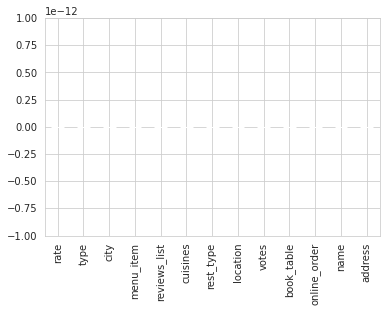

In [262]:
p_values.plot.bar()

In [0]:
import pandas as pd #import pandas
import numpy as np #import numpy
import matplotlib.pyplot as plt #import matplotlib
from scipy.stats import chi2_contingency #import chi2_contigency for chi2 independency tet
from matplotlib import style
style.use('ggplot')

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/E-commerce.csv')

In [266]:
df.shape

(23472, 9)

In [267]:
df.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,5,1,4,General,Dresses,Dresses
2,2,1077,60,3,0,0,General,Dresses,Dresses
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,5,1,6,General,Tops,Blouses


In [0]:
df.drop('Unnamed: 0',axis=1,inplace=True) #drop Unnamed: 0 column

In [269]:
df.columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [270]:
df.isnull().sum()

Clothing ID                0
Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [0]:
df_1 = df[['Rating','Recommended IND']] #store rating and Recommended IND in df_1

In [273]:
df_1.head()

,Rating,Recommended IND
0,4,1
1,5,1
2,3,0
3,5,1
4,5,1


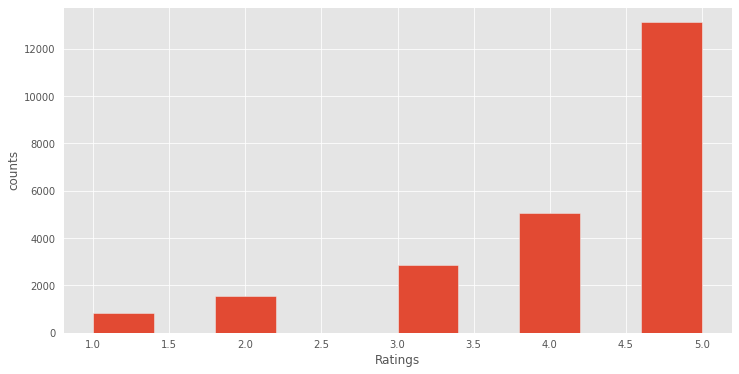

In [274]:
plt.figure(figsize=(12,6)) #set figure size
plt.hist(df_1['Rating']) #plot a histogram
plt.xlabel('Ratings') #set xlabel
plt.ylabel('counts') #set ylabel
plt.show()

In [275]:
cross_tab = pd.crosstab(df_1['Rating'],df_1['Recommended IND']).T
cross_tab

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13092


In [276]:
alpha = 0.05
stats,p_value,degrees_of_freedom,expected = chi2_contingency(cross_tab)
if p_value > alpha:
  print(f' Accept Null Hypothesis\n P-Value is {p_value}\n Recommendations are Independent of Ratings')
else:
  print(f' Reject Null Hypothesis\n P-Value is {p_value}\n Recommendations are not Independent of Ratings')

 Reject Null Hypothesis
 P-Value is 0.0
 Recommendations are not Independent of Ratings


In [0]:
recommended = df_1[df_1['Recommended IND']==1] #store all the recommended products in a recommended
not_recommended = df_1[df_1['Recommended IND']==0] #store all the not recommended products in a not recomme

In [278]:
recommended['Rating'].value_counts() #check the value counts in recommended

5    13092
4     4909
3     1189
2       94
1       16
Name: Rating, dtype: int64

In [279]:
not_recommended['Rating'].value_counts() #check the value counts in recommended

3    1682
2    1471
1     826
4     168
5      25
Name: Rating, dtype: int64

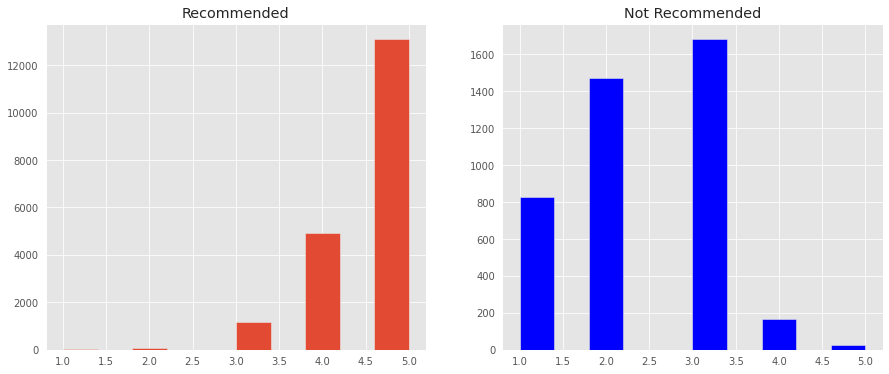

In [280]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
recommended['Rating'].hist(ax=ax1)
ax1.set_title('Recommended')
not_recommended['Rating'].hist(ax=ax2,color='blue')
ax2.set_title('Not Recommended')
plt.show()

In [0]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.preprocessing import scale
import researchpy as rp
import warnings
from scipy import stats
%matplotlib inline

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/blood_pressure.csv')

In [283]:
df.shape

(120, 5)

In [284]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [286]:
df.isnull().sum()

patient      0
sex          0
agegrp       0
bp_before    0
bp_after     0
dtype: int64

In [287]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


In [288]:
alpha = 0.05
Stats,p_value = stats.levene(df['bp_before'],df['bp_after'])
if p_value > alpha :
  print('Failed to reject null hypothesis, variances are same')
else :
  print('Reject null hypothesis, Variances are not same')

Reject null hypothesis, Variances are not same


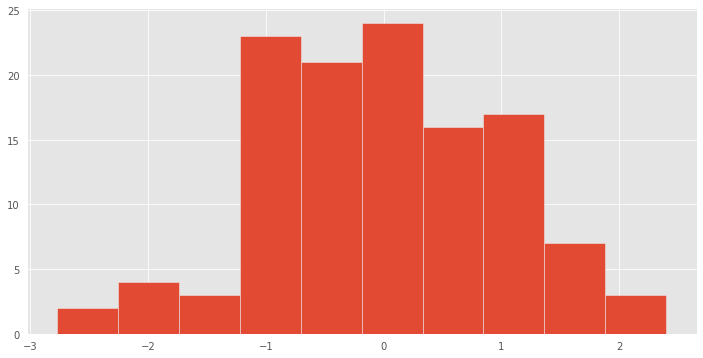

In [290]:
diff = scale(df['bp_before'] - df['bp_after']) #take the difference b/w before and after,and scale the differences
#plot histogram of scaled differences
plt.figure(figsize=(12,6))
plt.hist(diff)
plt.show()

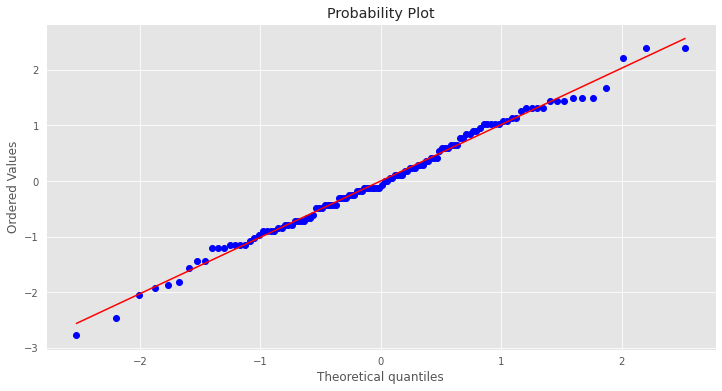

In [291]:
plt.figure(figsize=(12,6))
stats.probplot(diff, plot=plt, dist = 'norm')
plt.show()

In [292]:
alpha = 0.05
stats,p_value = stats.shapiro(diff)
if p_value > alpha:
  print('Failed to reject null hypothesis \n P-value: {}'.format(p_value))
else:
  print('Reject null hypothesis \n P-value: {}'.format(p_value))

Failed to reject null hypothesis 
 P-value: 0.7841646671295166


In [295]:
alpha = 0.05
statistic , p_value = stats.ttest_rel(df['bp_before'],df['bp_after'])
if p_value > alpha:
  print(f'Fail to reject Null Hypothesis p-value is {p_value}')
else:
  print(f'Reject Null Hypothesis \nP_value : {p_value}')

AttributeError: ignored

In [296]:
rp.ttest(df['bp_before'],df['bp_after'], equal_variances = False, paired =True)

,Wilcoxon signed-rank test,results
0,Mean for bp_before =,156.450000
1,Mean for bp_after =,151.358333
2,T value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000
